In [1]:
import time
import re
import html
import pandas as pd
import nltk
from nltk.corpus import stopwords

# --- Setup ---
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

mbti_types = [
    'INTJ', 'INTP', 'ENTJ', 'ENTP',
    'INFJ', 'INFP', 'ENFJ', 'ENFP',
    'ISTJ', 'ISFJ', 'ESTJ', 'ESFJ',
    'ISTP', 'ISFP', 'ESTP', 'ESFP'
]
mbti_pattern = r'\b(' + '|'.join(mbti_types) + r')\b'

# --- Text preprocessing function ---
def clean_text(text):
    text = html.unescape(str(text))
    text = text.replace('\n', ' ').replace('\\n', ' ')
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# --- Start full timer ---
total_start = time.time()

# --- Step 1: Load dataset ---
start = time.time()
df = pd.read_csv('mbti_full_pull.csv')
print(f"✅ Loaded dataset: {len(df)} rows in {time.time() - start:.2f}s")

# --- Step 2: Extract MBTI ---
start = time.time()
def extract_mbti(text):
    match = re.findall(mbti_pattern, str(text).upper())
    return match[0] if match else None

df['MBTI'] = df['author_flair_text'].apply(extract_mbti)
before = len(df)
df = df.dropna(subset=['MBTI'])
print(f"✅ Extracted MBTI. Dropped {before - len(df)} rows in {time.time() - start:.2f}s")

# --- Step 3: Remove posts mentioning MBTI in raw body ---
start = time.time()
df['body'] = df['body'].astype(str)
before = len(df)
df = df[~df['body'].str.upper().str.contains(mbti_pattern)]
print(f"✅ Dropped {before - len(df)} posts mentioning MBTI in {time.time() - start:.2f}s")

# --- Step 4: Remove empty posts ---
start = time.time()
before = len(df)
df = df[df['body'].str.strip() != '']
print(f"✅ Removed {before - len(df)} empty body posts in {time.time() - start:.2f}s")

# --- Step 5: Remove duplicate raw body posts ---
start = time.time()
before = len(df)
df = df.drop_duplicates(subset='body')
print(f"✅ Removed {before - len(df)} duplicate body posts in {time.time() - start:.2f}s")

# --- Step 6: Clean and normalize text ---
start = time.time()
df['POST'] = df['body'].apply(clean_text)
print(f"✅ Cleaned and normalized text in {time.time() - start:.2f}s")

# --- Step 7: Filter by word count ---
start = time.time()
df['clean_word_count'] = df['POST'].apply(lambda x: len(x.split()))
before = len(df)
df = df[(df['clean_word_count'] >= 10) & (df['clean_word_count'] <= 1000)]
print(f"✅ Removed {before - len(df)} posts outside [10, 1000] words in {time.time() - start:.2f}s")

# --- Step 8: Drop duplicate cleaned POSTs ---
start = time.time()
before = len(df)
df = df.sort_values(by='POST')
df = df.drop_duplicates(subset='POST')
print(f"✅ Removed {before - len(df)} duplicate cleaned POSTs in {time.time() - start:.2f}s")

# --- Final output ---
df_cleaned = df[['MBTI', 'POST']].reset_index(drop=True)
df_cleaned.to_csv("cleaned_mbti_basic.csv", index=False)
print(f"\n📁 Saved to cleaned_mbti_basic.csv")
print(f"📊 Final cleaned dataset has {len(df_cleaned)} rows")
print(f"⏱️ Total preprocessing time: {time.time() - total_start:.2f}s")


/Users/dingzeyuan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/dingzeyuan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dingzeyuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FileNotFoundError: [Errno 2] No such file or directory: 'mbti_full_pull.csv'

In [ ]:
#df_cleaned.to_csv("cleaned_mbti.csv", index=False)
#print("📁 Cleaned data saved as cleaned_mbti.csv")

In [ ]:
df_cleaned.describe() 

,MBTI,POST
count,810538,810538
unique,16,810538
top,INTP,help moment hobby keep mind busy dont like look depression im always depressed lol moment get back easily depression feel like word trap cant get oo know well get
freq,223321,1


In [ ]:
pd.set_option('display.max_colwidth', None)


df_cleaned.head(20)

,MBTI,POST
0,INFJ,help moment hobby keep mind busy dont like look depression im always depressed lol moment get back easily depression feel like word trap cant get oo know well get
1,INTP,watch bit everything including hentai tend enjoy jav larger women quite bbw though cant watch anything focuses whatever shitty fake facial expression girl making
2,INTJ,think military job people voluntarily go job important show deference endanger lives glorify way civilians think im pretty ignorant general think military necessary defense mechanism political tactic feel like us specifically invests much money could putting money education whatnot though personally dont sound budget alternative cant really comment one way
3,INFJ,mostly try get caught anything get focused goal sometimes running forward stop look around realize im completely lost try keep perspective
4,INTJ,based two politicians eyes years ago came name somewhat important kinda rolemodels nowadays wouldnt pick kept
5,INTJ,scores individual level mean little vary according number conditions days may score higher others lower dont sweat
6,ENTJ,well consider freud considered father psychoanalysis findings exactly reliable mbti subreddit something slightly reliable followed something less reliable learning reddit could simply source inspiration put together slightly reliable picture people around us
7,INFJ,wow actually makes lot sense never really knew meant think might right thats pretty scary
8,INTJ,really good casting im physiotherapist like fiberglass casts break arm whatever sometimes want take picture beast ive put someones arm sadly people blind brilliance
9,INTJ,need tell directly waving arms frantically totally beyond oblivious getting better eye contact helps lot im starting find like attention im getting opposite sex im noticing however gay men tend little aggressive always walk away flattered


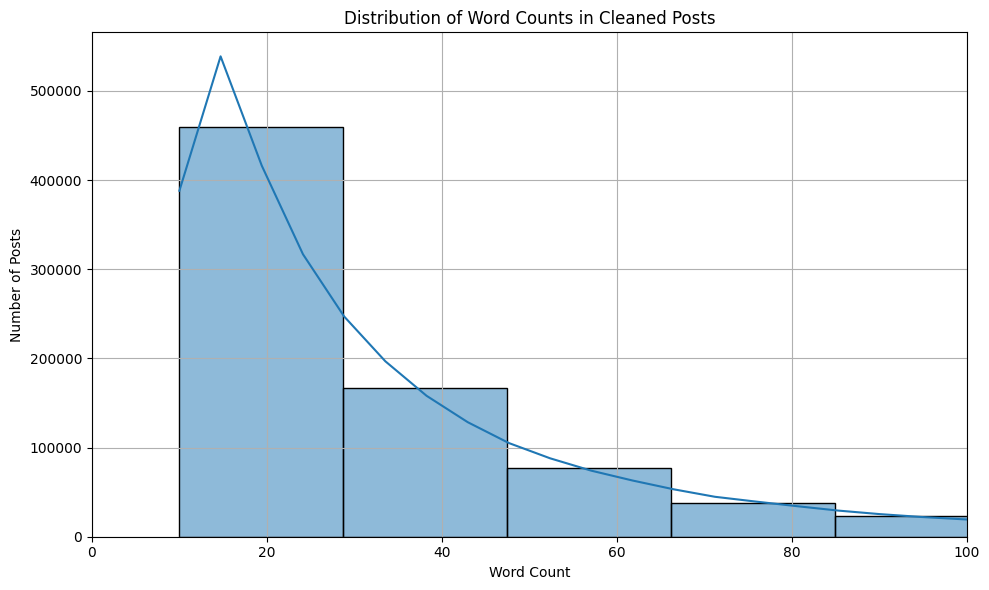

/var/folders/cc/j3m36dg54q5_cqjgmjr2mht40000gn/T/ipykernel_16780/1036165939.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="coolwarm")


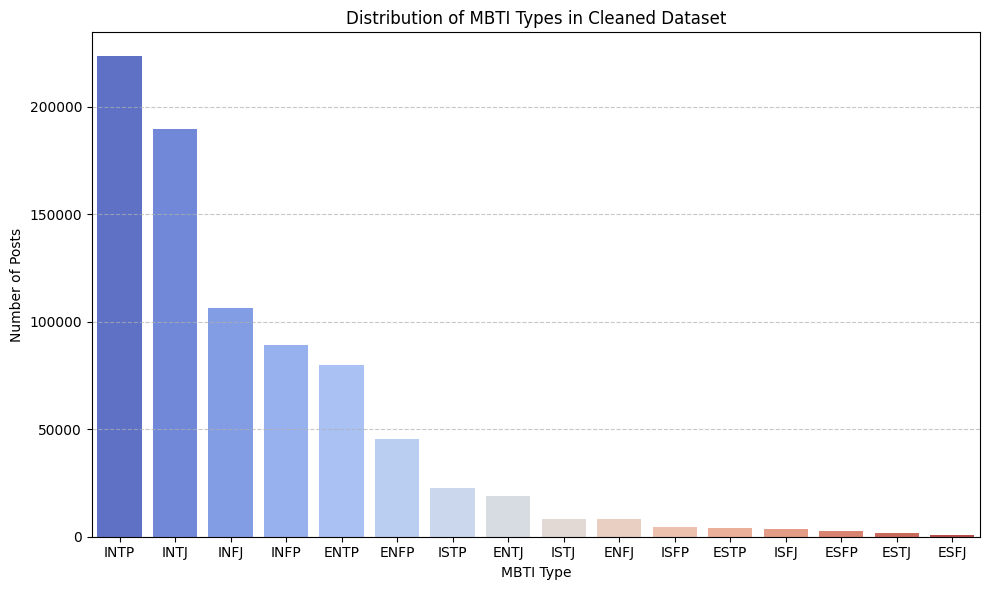

🧾 MBTI Type Sample Counts:

MBTI
INTP    223321
INTJ    189595
INFJ    106464
INFP     89359
ENTP     80009
ENFP     45460
ISTP     22554
ENTJ     19092
ISTJ      8418
ENFJ      8361
ISFP      4538
ESTP      4193
ISFJ      3739
ESFP      2690
ESTJ      1822
ESFJ       923
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 添加词数列
df_cleaned['word_count'] = df_cleaned['POST'].apply(lambda x: len(str(x).split()))

# 1️⃣ 词数分布图
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['word_count'], bins=50, kde=True)
plt.title("Distribution of Word Counts in Cleaned Posts")
plt.xlabel("Word Count")
plt.ylabel("Number of Posts")
plt.xlim(0, 100)  # 如果太右偏可调，比如 (0, 200)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2️⃣ MBTI 类型分布条形图
type_counts = df_cleaned['MBTI'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="coolwarm")
plt.title("Distribution of MBTI Types in Cleaned Dataset")
plt.xlabel("MBTI Type")
plt.ylabel("Number of Posts")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3️⃣ 输出每类样本数量
print("🧾 MBTI Type Sample Counts:\n")
print(type_counts)
